# Tempo de carreira

In [56]:
import pandas as pd

df = pd.read_csv(r"C:\Users\rodol\Videos\Desktop\Projetos\Churn_funcionarios\Base_RH_csv2.csv", sep=';', encoding='latin-1')

# Criando um DataFrame
data = {'Grupos': df['Tempo_de_carreira']}
df = pd.DataFrame(data)

# Definindo os intervalos
bins = [0, 3, 6, 9, 12, 15, 18, 21, 90]
labels = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '>21']

# Agrupando em intervalos
df['Grupos'] = pd.cut(df['Grupos'], bins=bins, labels=labels, right=False)

# Contando as frequências
frequencias_absolutas = df['Grupos'].value_counts().sort_index()

# Calculando a frequência relativa
total_elementos = len(df)
frequencias_relativas = (frequencias_absolutas / total_elementos) * 100

# Calculando a frequência acumulada
frequencias_acumuladas = frequencias_relativas.cumsum()

# Criando um DataFrame com resultados
resultados = pd.DataFrame({
    'Freq. Absoluta': frequencias_absolutas,
    'Freq. Relativa (%)': round(frequencias_relativas, 2),  # Arredondando para 2 casas decimais
    'Freq. Acumulada (%)': round(frequencias_acumuladas,2)
})

display(resultados)

,Freq. Absoluta,Freq. Relativa (%),Freq. Acumulada (%)
Grupos,,,
0-2,123,8.37,8.37
3-5,193,13.13,21.50
6-8,309,21.02,42.52
9-11,334,22.72,65.24
12-14,115,7.82,73.06
15-17,110,7.48,80.54
18-20,79,5.37,85.92
>21,207,14.08,100.00


In [20]:
import pandas as pd

# Min e Max
idade_min = df['Tempo_de_carreira'].min()
idade_max = df['Tempo_de_carreira'].max()

# Média
media = df['Tempo_de_carreira'].mean()

# Calcular os quartis
primeiro_quartil = df['Tempo_de_carreira'].quantile(0.25)
segundo_quartil = df['Tempo_de_carreira'].quantile(0.50)  # Mediana
terceiro_quartil = df['Tempo_de_carreira'].quantile(0.75)

print("O Tempo_de_carreira mínimo é:", idade_min)
print("Primeiro quartil (Q1):", primeiro_quartil)
print("Segundo quartil (Q2 - Mediana):", segundo_quartil)
print("Terceiro quartil (Q3):", terceiro_quartil)
print("O Tempo_de_carreira máximo é:", idade_max)
print("A média de Tempo_de_carreira máximo é:", round(media,2))

O Tempo_de_carreira mínimo é: 0
Primeiro quartil (Q1): 6.0
Segundo quartil (Q2 - Mediana): 10.0
Terceiro quartil (Q3): 15.0
O Tempo_de_carreira máximo é: 40
A média de Tempo_de_carreira máximo é: 11.28


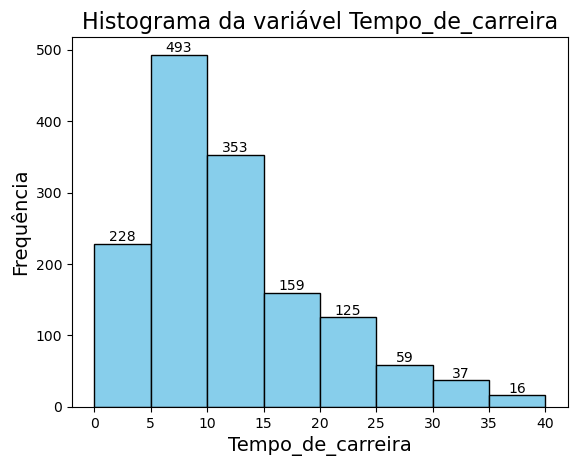

In [18]:
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\rodol\Videos\Desktop\Projetos\Churn_funcionarios\Base_RH_csv2.csv", sep=';', encoding='latin-1')

def plot_histograma(dados, coluna, bins=8):
    # Criar o histograma e obter os dados das barras
    counts, bins, patches = plt.hist(dados[coluna], bins=bins, color='skyblue', edgecolor='black')

    # Adicionar título e rótulos
    plt.title(f'Histograma da variável {coluna}', fontsize=16)
    plt.xlabel(coluna, fontsize=14)
    plt.ylabel('Frequência', fontsize=14)

    # Adicionar rótulos de frequências acima de cada barra
    for count, bin_edge in zip(counts, bins):
        plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

    # Mostrar o gráfico
    plt.show()


plot_histograma(df, 'Tempo_de_carreira', bins=8)